# Predicting Car Prices

In this project, we will use the k-nearest neighbours algorithm to predict a car's market price using the attributes from the dataset.

## Dataset information

This dataset originates from the UCI Machine Learning Repository and was collected in 1987.

It consists of three types of entities: 
     1. the specification of an auto in terms of various characteristics, 
     2. its assigned insurance risk rating 
     3. its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. 

## Attribute information


| Attribute              | Attribute Range                                  |
|:-----------------------|--------------------------------------------------|
| 1. symboling:          | -3, -2, -1, 0, 1, 2, 3.                          |
| 2. normalized-losses:  | continuous from 65 to 256.                       |
| 3. make:               | alfa-romero, audi, bmw, chevrolet, dodge, ...    |
| 4. fuel-type:          | diesel, gas.                                     |
| 5. aspiration:         | std, turbo.                                      |
| 6. num-of-doors:       | four, two.                                       |
| 7. body-style:         | hardtop, wagon, sedan, hatchback, convertible.   |
| 8. drive-wheels:       | 4wd, fwd, rwd.                                   |
| 9. engine-location:    | front, rear.                                     |
| 10. wheel-base:        | continuous from 86.6 120.9.                      |
| 11. length:            | continuous from 141.1 to 208.1.                  |
| 12. width:             | continuous from 60.3 to 72.3.                    |
| 13. height:            | continuous from 47.8 to 59.8.                    |
| 14. curb-weight:       | continuous from 1488 to 4066.                    |
| 15. engine-type:       | dohc, dohcv, l, ohc, ohcf, ohcv, rotor.          |
| 16. num-of-cylinders:  | eight, five, four, six, three, twelve, two.      |
| 17. engine-size:       | continuous from 61 to 326.                       |
| 18. fuel-system:       | 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.    |
| 19. bore:              | continuous from 2.54 to 3.94.                    |
| 20. stroke:            | continuous from 2.07 to 4.17.                    |
| 21. compression-rate:  | continuous from 7 to 23.                         |
| 22. horsepower:        | continuous from 48 to 288.                       |
| 23. peak-rpm:          | continuous from 4150 to 6600.                    |
| 24. city-mpg:          | continuous from 13 to 49.                        |
| 25. highway-mpg:       | continuous from 16 to 54.                        |
| 26. price:             | continuous from 5118 to 45400.</pre>             |


In [291]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Display plot outputs
%matplotlib inline

# Reading data into df
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
        'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 
        'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data.txt', names=cols)

## Data Exploration

In [292]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [293]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [294]:
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-rate,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


At first glance, there are a number of columns which are not numeric. We will need to remove these columns to create a usable dataset.

Also, we can see there are some missing data denoted by "?". Therefore we should replace these values with NaN so that figure out how many many missing data points we have. 

Since the main goal of this project is to construct a working model which has the capability of predicting the prices of the cars, we have separated the dataset into features and the target variable. The features, which consist of numerical data,  give us quantitative information about each data point. The target variable 'price' will be the variable we seek to predict. 

In [295]:
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[numeric_cols]

In [296]:
numeric_cars = numeric_cars.replace("?", np.nan)
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22,NaN


In [297]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [298]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


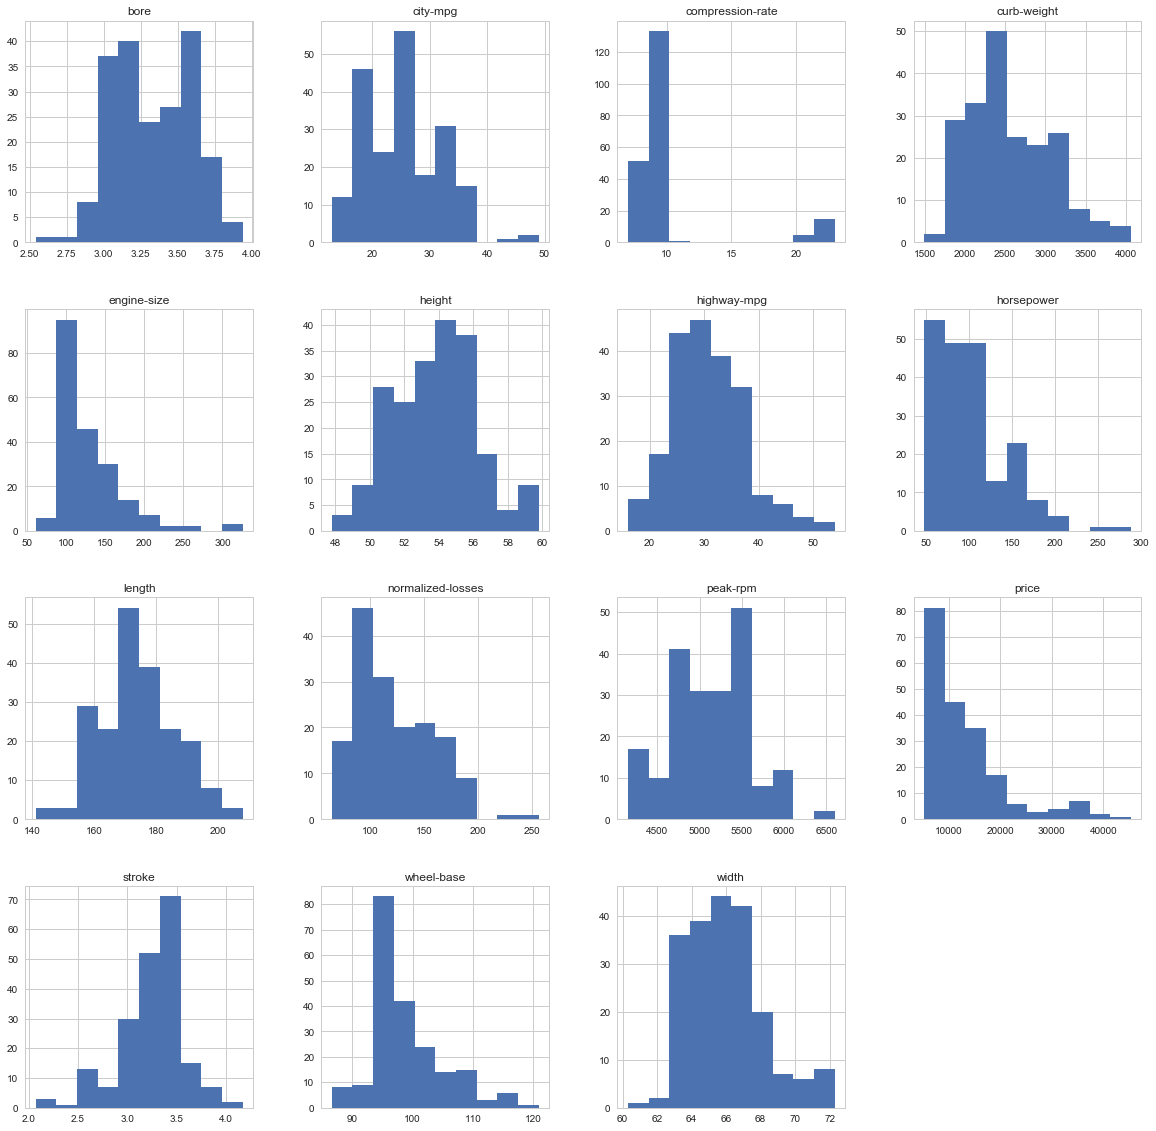

In [299]:
p = numeric_cars.hist(figsize = (20,20), bins=10)

In [300]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [301]:
# Replace missing values
numeric_cars['bore'].fillna(numeric_cars['bore'].mean(), inplace=True)
numeric_cars['stroke'].fillna(numeric_cars['stroke'].median(), inplace=True)
numeric_cars['horsepower'].fillna(numeric_cars['horsepower'].median(), inplace=True)
numeric_cars['peak-rpm'].fillna(numeric_cars['peak-rpm'].median(), inplace=True)
numeric_cars['normalized-losses'].fillna(numeric_cars['normalized-losses'].median(), inplace=True)

numeric_cars = numeric_cars.fillna(numeric_cars.mean())

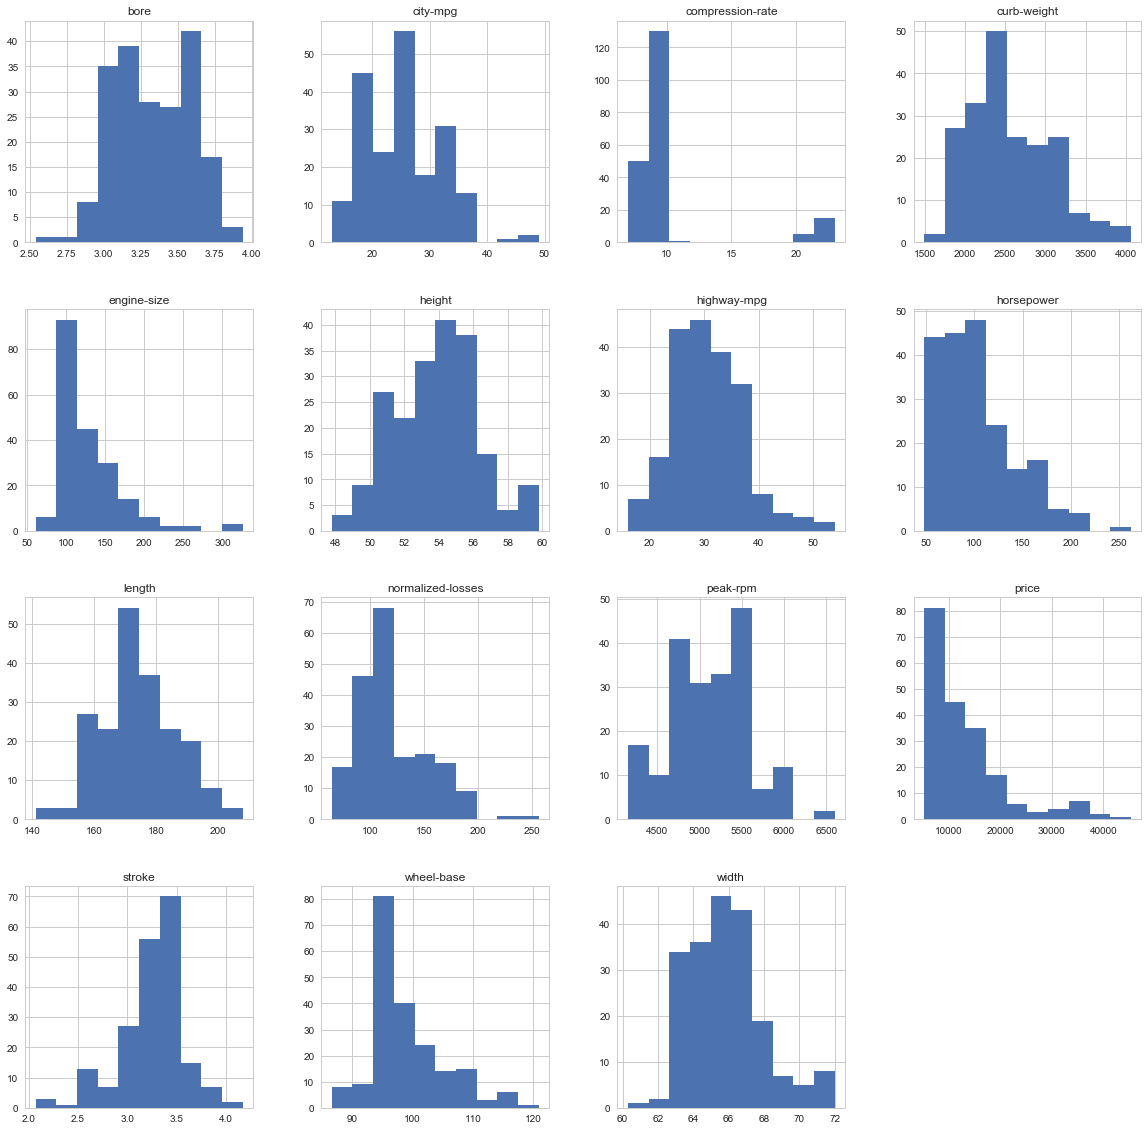

In [302]:
p = numeric_cars.hist(figsize = (20,20), bins=10)

In [303]:
# Confirm that there's no more missing values!
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [304]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

## Univariate model

In [305]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3238.462830
horsepower           4059.625175
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7269.478510
peak-rpm             7728.612443
height               8144.441043
stroke               8223.908548
dtype: float64

In [306]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized-losses': {1: 7735.71847450718,
  3: 7364.6999825371895,
  5: 7269.478509712256,
  7: 7493.009484861897,
  9: 7489.377107747093},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
 

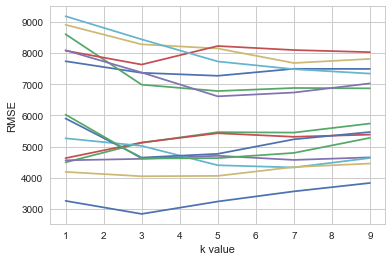

In [307]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Multivariate model

In [308]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

engine-size          3346.484586
horsepower           4218.858348
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7470.456712
stroke               8010.083449
peak-rpm             8033.143317
height               8163.346266
dtype: float64

In [309]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [3]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['engine-size', 'horsepower']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['engine-size', 'horsepower', 'width']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['engine-size', 'horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['engine-size', 'horsepower', 'width', 'curb-weight' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['engine-size', 'horsepower', 'width', 'curb-weight' , 'highway-mpg' , 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

seven_best_features = ['engine-size', 'horsepower', 'width', 'curb-weight' , 'highway-mpg' , 'length', 'city-mpg']
rmse_val = knn_train_test(seven_best_features, 'price', numeric_cars)
k_rmse_results["seven best features"] = rmse_val

eight_best_features = ['engine-size', 'horsepower', 'width', 'curb-weight' , 'highway-mpg' , 'length', 'city-mpg', 'wheel-base']
rmse_val = knn_train_test(eight_best_features, 'price', numeric_cars)
k_rmse_results["eight best features"] = rmse_val

k_rmse_results

{'two best features': {3: 2771.5216577234105},
 'three best features': {3: 3349.000113821472},
 'four best features': {3: 3113.1041655644235},
 'five best features': {3: 3020.2760692780157},
 'six best features': {3: 2944.9990332478183},
 'seven best features': {3: 2888.915844166366},
 'eight best features': {3: 3291.8988668570846}}

## Multivariate model (top 3)

In [310]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['engine-size', 'horsepower']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['engine-size', 'horsepower', 'width']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['engine-size', 'horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['engine-size', 'horsepower', 'width', 'curb-weight' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['engine-size', 'horsepower', 'width', 'curb-weight' , 'highway-mpg' , 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

seven_best_features = ['engine-size', 'horsepower', 'width', 'curb-weight' , 'highway-mpg' , 'length', 'city-mpg']
rmse_val = knn_train_test(seven_best_features, 'price', numeric_cars)
k_rmse_results["seven best features"] = rmse_val

eight_best_features = ['engine-size', 'horsepower', 'width', 'curb-weight' , 'highway-mpg' , 'length', 'city-mpg', 'wheel-base']
rmse_val = knn_train_test(eight_best_features, 'price', numeric_cars)
k_rmse_results["eight best features"] = rmse_val

k_rmse_results

{'two best features': {1: 2783.6204237227344,
  2: 2640.768504536976,
  3: 2771.5216577234105,
  4: 2817.719146093588,
  5: 2887.026388230048,
  6: 3064.8179326668064,
  7: 3125.411304676341,
  8: 3393.145398184995,
  9: 3720.6980964955837,
  10: 4050.7963888305194,
  11: 4185.829555535881,
  12: 4252.862762060814,
  13: 4329.301332859487,
  14: 4383.511086681544,
  15: 4512.7164577383755,
  16: 4648.178015608869,
  17: 4713.486072094747,
  18: 4778.6320206439705,
  19: 4805.61288527215,
  20: 4831.852957814486,
  21: 4827.653227734407,
  22: 4818.519302532826,
  23: 4845.918210829711,
  24: 4895.104302352821},
 'three best features': {1: 3399.8148100410203,
  2: 3498.01989143731,
  3: 3349.000113821472,
  4: 3330.3952949379077,
  5: 3546.3715261636307,
  6: 3713.283123205166,
  7: 3625.511672558252,
  8: 3734.6053260508766,
  9: 3970.818577713884,
  10: 3995.485333708683,
  11: 4106.5946967574855,
  12: 4264.943769901725,
  13: 4321.282917079876,
  14: 4328.933230260423,
  15: 4388.47

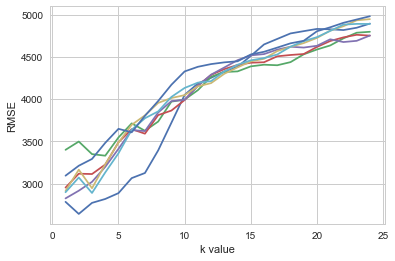

In [311]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')